# Miniproject: Taxi

Продвинутый pandas и знакомство с визуализацией на python

Данные по поездкам на такси. С рейтингами водителей, пассажиров, координатами, и парой других деталей. 

- journey_id – уникальный id поездки
- user_id – id пользователя
- driver_id – id водителя
- taxi_id – id машины
- icon – тип поездки
- start_type – тип заказа (asap, reserved, delayed)
- start_at – время начала поездки
- start_lat – исходное местоположение пользователя, широта
- start_lon – исходное местоположение пользователя, долгота
- end_at – время окончания поездки
- end_lat – итоговое местоположение, широта
- end_lon – итоговое местоположение, долгота
- end_state – состояние заказа
- driver_start_lat – исходное местоположение водителя, широта
- driver_start_lon – исходное местоположение водителя, долгота
- arrived_at – время прибытия водителя
- source – платформа, с которой сделан заказ
- driver_score – оценка водителя клиентом
- rider_score – оценка клиента водителем

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
taxi = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-eremina/lesson_3/3_taxi_peru.csv', sep =';', parse_dates = ['start_at', 'end_at', 'arrived_at'])

In [9]:
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


**Проверьте, с какой платформы было сделано больше всего заказов. В ответе укажите значение в %, округлённое до целого.**

In [10]:
tx = taxi.groupby('source', as_index = False) \
    .agg({'journey_id' : 'count'}) \
    .sort_values('journey_id', ascending=False)
tx

,source,journey_id
3,iPhone,9741
4,web,7631
0,Android,4909
2,iPad,571
1,Wap,136


In [11]:
int(tx.journey_id[3] / tx.journey_id.sum() * 100)

42

In [14]:
# Другой способ
int(((taxi.source.value_counts() / len(taxi)) * 100).max())

42

In [15]:
taxi_counts = (taxi['source'].value_counts() # используем value_counts для подсчета значений, без параметра
               .reset_index() # сбрасываем индекс
               .rename({'index':'source', 'source':'cnt'}, axis='columns')  # меняем названия колонок
              )

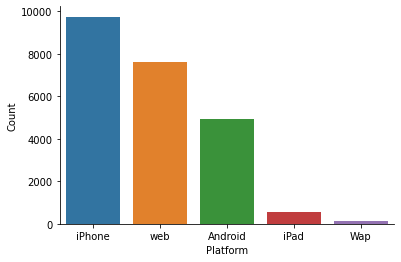

In [16]:
ax = sns.barplot(x='source', y='cnt', data=taxi_counts)
ax.set(xlabel='Platform', ylabel='Count')  # подписываем оси
sns.despine()  # убрать часть рамки графика
plt.show()

Альтернативный вариант построения распределения категориальной переменной – sns.countplot. 
В качестве единственного аргумента можно передать всего одну колонку: например, source, а количество значений для оси y функция посчитает самостоятельно.

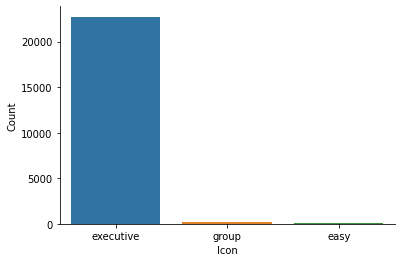

In [17]:
a = sns.countplot(x='icon', data=taxi)  # строим и записываем в переменную
a.set(xlabel='Icon', ylabel='Count')  # подписываем оси
sns.despine()  # убрать часть рамки графика
plt.show()

**С помощью sns.countplot и параметра hue визуализируйте распределение переменной end_state (итоговое состояние заказа) в разбивке по платформам.**

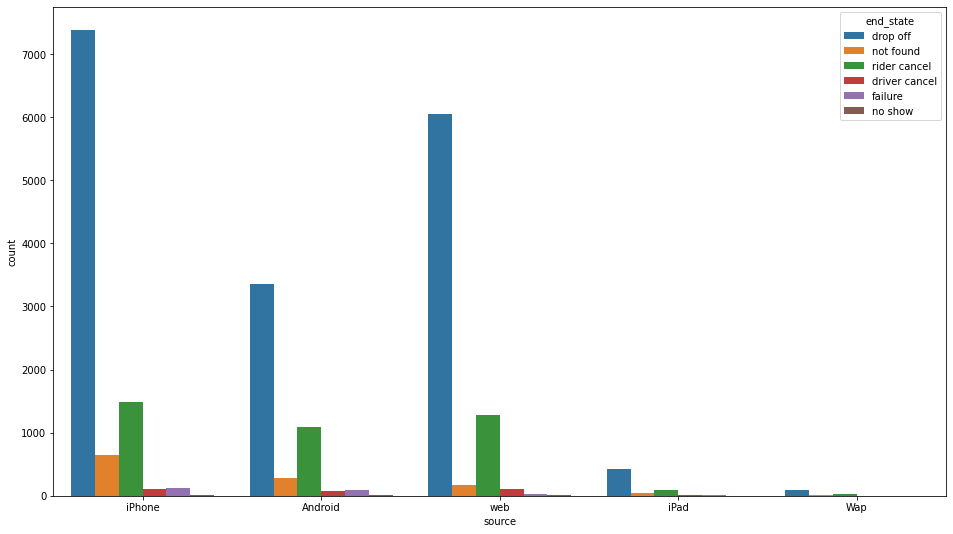

In [18]:
plt.figure(figsize=(16,9))  # указываем размер графика, чтобы он был побольше
sns.countplot(data=taxi, hue='end_state', x='source')  # строим график с нужными параметрами
plt.show() 

Считаем частоту значений в колонке driver_score, переводим в проценты, округляем до 2-ого знака, сбрасываем индексы, переименовываем колонки, сортируем

In [19]:
driver_score_counts = (
    taxi.driver_score
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
    .reset_index() 
    .rename(columns={'driver_score' : 'percentage', 'index' : 'driver_score'})
    .sort_values('driver_score')
    )

In [20]:
driver_score_counts

,driver_score,percentage
2,0.0,14.30
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.88
0,5.0,58.81


In [21]:
rider_score_counts = (
    taxi.rider_score
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
    .reset_index() 
    .rename(columns={'rider_score' : 'percentage', 'index' : 'rider_score'})
    .sort_values('rider_score')
    )

In [22]:
rider_score_counts

,rider_score,percentage
2,0.0,2.29
4,1.0,0.21
5,2.0,0.19
3,3.0,1.38
1,4.0,8.83
0,5.0,87.10


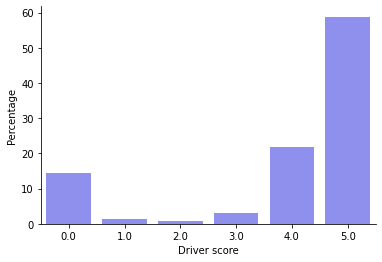

In [23]:
ax = sns.barplot(x='driver_score', y='percentage', data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  
plt.show()

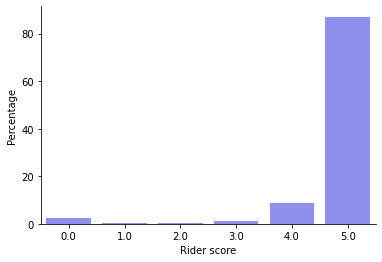

In [24]:
ax = sns.barplot(x='rider_score', y='percentage', data=rider_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Rider score', ylabel='Percentage')
sns.despine() 
plt.show()

**Приведите столбцы start_at, end_at, arrived_at к формату даты, используя pd.to_datetime(). Отфильтруйте данные и оставьте наблюдения со статусом заказа "asap" и "reserved" (start_type).**

In [25]:
taxi[['start_at', 'end_at', 'arrived_at']] = taxi[['start_at', 'end_at', 'arrived_at']].apply(pd.to_datetime)
taxi = taxi.query('start_type == "asap" or start_type == "reserved"')

**Создайте колонку wait_time, в которой будет храниться разница между временем подачи машины (arrived_at) и временем заказа (start_at) в минутах.**

In [26]:
taxi['wait_time']  = (taxi.arrived_at - taxi.start_at).astype('timedelta64[m]')

**Какие водители опаздывали на заказы к определенному времени (start_type == 'reserved').**

Опозданием считается время ожидания wait_time > 0.0.

В качестве ответа укажите id водителя, который опоздал на заказ интересующего нас типа наибольшее число раз

In [27]:
taxi.query('start_type == "reserved" and wait_time > 0.0') \
    .driver_id.value_counts() \
    .idxmax()

'406921adcca37705ef527b4246c0cfea'

**Добавьте столбец month, где будет храниться номер месяца, в котором был сделан заказ (start_at), и столбец weekday – название дня недели.**

In [28]:
taxi['month'] = taxi.start_at.dt.strftime('%m')
taxi['weekday'] = taxi.start_at.dt.strftime('%A')
taxi = taxi.astype({'month' : 'int'})

# Другой метод:
# taxi['month'] = taxi.start_at.dt.month
# taxi['weekday'] = taxi.start_at.dt.day_name()

In [29]:
taxi.dtypes

journey_id                  object
user_id                     object
driver_id                   object
taxi_id                     object
icon                        object
start_type                  object
start_at            datetime64[ns]
start_lat                   object
start_lon                   object
end_at              datetime64[ns]
end_lat                     object
end_lon                     object
end_state                   object
driver_start_lat            object
driver_start_lon            object
arrived_at          datetime64[ns]
source                      object
driver_score               float64
rider_score                float64
wait_time                  float64
month                        int64
weekday                     object
dtype: object

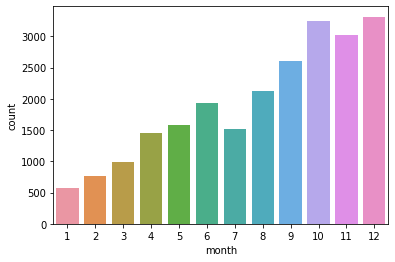

In [30]:
# График числа заказов по месяцам 
sns.countplot(x='month', data=taxi)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


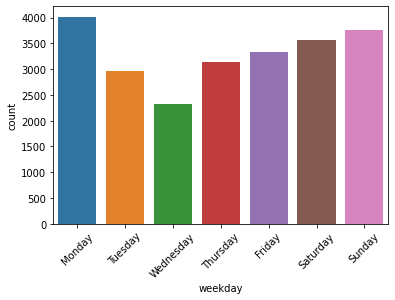

In [32]:
# График по дням недели (weekday)
ax = sns.countplot(taxi['weekday'], order=['Monday', 'Tuesday', 'Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday'])
ax.tick_params(axis='x', rotation = 45)

In [33]:
# ДРУГОЙ МЕТОД установки порядка
taxi.weekday = pd.Categorical(taxi.weekday, ordered=True, categories = ['Monday', 'Tuesday', 'Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday'])

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


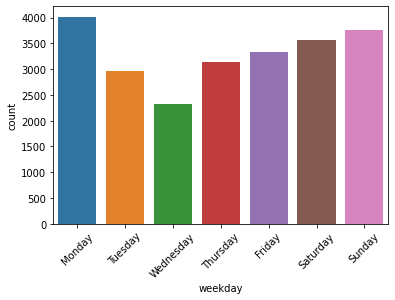

In [34]:
ax = sns.countplot(taxi['weekday'])
ax.tick_params(axis='x', rotation = 45)

### DAU (daily active users) – число уникальных пользователей за день
### WAU (weekly active users) – число уникальных пользователей за неделю
### MAU (monthly active users) – число уникальных пользователей за месяц

**Постройте график MAU**

In [35]:
MAU = taxi \
    .groupby('month', as_index = False) \
    .agg({'user_id' : 'nunique'})

In [36]:
MAU

,month,user_id
0,1,102
1,2,110
2,3,162
3,4,253
4,5,275
5,6,309
6,7,318
7,8,377
8,9,416
9,10,437


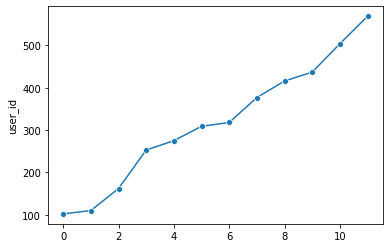

In [37]:
sns.lineplot(data=MAU.user_id, marker='o')
# plt.saving('MAU_plot.png')